[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[[1 2]
 [5 6]]


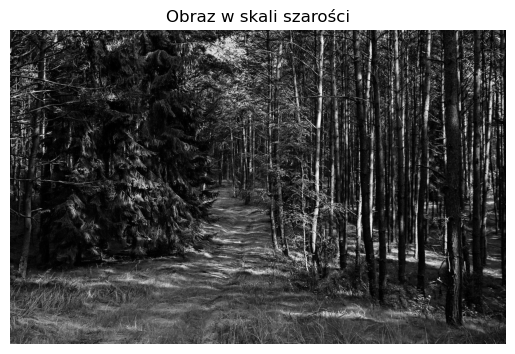

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(A)
print()
print(A[:2,:2])

img = Image.open("data/las.jpg")
img_gray = img.convert('L')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Obraz w skali szarości')
plt.show()

(811, 1280)


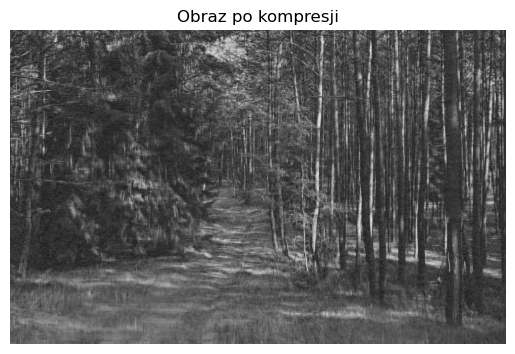

In [24]:
matrix_gray = np.array(img_gray)
print(matrix_gray.shape)

U, E, V_t = np.linalg.svd(matrix_gray)
r = 100
compressed_img = np.matrix(U[:,:r])*np.diag(E[:r])*np.matrix(V_t[:r,:])
plt.imshow(compressed_img, cmap='gray')
plt.axis('off')
plt.title("Obraz po kompresji")
plt.show()

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

df = pd.read_excel("data.xlsx", sheet_name='dataframe')
df.sort_values(by='2019Q2_aktywa', ascending=False).head()

,Nazwa,2019Q2_aktywa,2019Q1_aktywa,2018Q2_aktywa,2019Q2_mobile,2019Q1_mobile,2018Q2_mobile,2019Q2_internet,2019Q1_internet,2018Q2_internet,...,2018Q2_placowki,2019Q2_partner,2019Q1_partner,2018Q2_partner,2019Q2_etat,2019Q1_etat,2018Q2_etat,2019Q2_etat_grupa,2019Q1_etat_grupa,2018Q2_etat_grupa
12,PKO BP,301339000,298403000,276088000,2136646,2012570,1534243,8680400,10935000,10262200,...,1176,535,557,600,24100,24200,24700,28100,27900,28500
2,Bank Pekao,189574297,189494130,178781524,889475,778537,623599,3340969,3330006,3171625,...,851,-1,-1,-1,14436,14591,15182,16613,16815,17307
14,Santander Bank Polska,181300141,185555589,147610558,1111843,1048828,814928,3904082,3825991,3259127,...,540,124,124,113,11113,11695,11174,14058,14642,14286
10,ING Bank Śląski,147057000,142042800,127108000,1372000,1288000,1014585,3975000,3894000,3605069,...,352,-1,-1,-1,7693,7644,7630,8119,8063,8026
11,mBank,143942202,142564251,132012206,1673786,1571093,1296379,3928090,3914732,3676510,...,140,41,41,41,5993,5919,5682,6677,6576,6358


In [4]:
def apply_scalers(df, columns_to_exclude = None):
    if columns_to_exclude:
        exclude_filter = ~df.columns.isin(columns_to_exclude)
    else:
        exclude_filter = ~df.columns.isin([])
    for column in df.iloc[:,exclude_filter].columns:
        df[column] = df[column].astype(float)

    df.loc[:,exclude_filter] = StandardScaler().fit_transform(df.loc[:,exclude_filter])
    return df

df = apply_scalers(df, columns_to_exclude=['Nazwa'])
df.sort_values(by='2019Q2_aktywa', ascending=False).head()

,Nazwa,2019Q2_aktywa,2019Q1_aktywa,2018Q2_aktywa,2019Q2_mobile,2019Q1_mobile,2018Q2_mobile,2019Q2_internet,2019Q1_internet,2018Q2_internet,...,2018Q2_placowki,2019Q2_partner,2019Q1_partner,2018Q2_partner,2019Q2_etat,2019Q1_etat,2018Q2_etat,2019Q2_etat_grupa,2019Q1_etat_grupa,2018Q2_etat_grupa
12,PKO BP,2.439176,2.451434,2.549791,2.272044,2.289286,2.208174,2.870860,3.180157,3.212267,...,2.699725,0.087071,0.104621,0.147944,2.867369,2.842515,2.940044,2.707886,2.691490,2.777432
2,Bank Pekao,1.170632,1.173505,1.287303,0.430077,0.354995,0.389769,0.495076,0.363630,0.395437,...,1.632315,-0.387541,-0.389552,-0.382783,1.243987,1.244292,1.360658,1.237344,1.274860,1.356310
14,Santander Bank Polska,1.076719,1.127290,0.882881,0.758496,0.778664,0.771821,0.745633,0.547319,0.430198,...,0.610887,-0.276857,-0.278850,-0.282112,0.685782,0.762614,0.695584,0.910259,0.997157,0.972748
10,ING Bank Śląski,0.688055,0.616714,0.616873,1.142726,1.153556,1.170503,0.777188,0.572506,0.567629,...,-0.006569,-0.387541,-0.389552,-0.382783,0.111283,0.088829,0.107505,0.149960,0.156381,0.177946
11,mBank,0.652702,0.622833,0.680502,1.588438,1.597291,1.733199,0.756316,0.580184,0.596010,...,-0.702848,-0.350351,-0.352356,-0.345694,-0.174287,-0.198083,-0.215740,-0.034642,-0.033653,-0.033832


In [7]:
exclude_filter = ~df.columns.isin(['Nazwa'])
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(df.loc[:,exclude_filter])
principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3'])
principal_df['Nazwa'] = df['Nazwa']
principal_df

,PC1,PC2,PC3,Nazwa
0,0.077224,0.478463,-0.087593,Alior Bank
1,-0.155617,1.011251,-1.684940,Bank Millennium
2,5.806928,-1.201618,4.169210,Bank Pekao
3,-5.294890,-2.552920,-1.466663,Bank Pocztowy
4,-0.352859,-0.743658,3.437079,BNP Paribas
5,-5.629305,-0.439033,-0.216447,BOŚ Bank
6,-4.457429,0.159757,0.291037,Citi Handlowy
7,-3.445918,-0.670329,0.131263,Credit Agricole
8,-4.288005,-0.907453,-0.374221,Eurobank
9,-4.828903,-1.215840,0.050449,Getin Noble Bank


In [8]:
!pip install chart_studio

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 882.6 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/9.8 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.8 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.8 MB 1.3 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.8 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.8 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.8 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.8 MB 1.3 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.8 MB 1.4 MB/s eta 0:00:06
   ------------- -------------------------- 3.4/9.8 MB 1.4 MB/s eta 0:00:05
   -------------- -------------

In [9]:
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [10]:
init_notebook_mode(connected=True)

In [16]:
trace = go.Scatter(
    x = principal_df['PC1'],
    y = principal_df['PC2'],
    text = principal_df['Nazwa'],
    textposition = 'top center',
    name = 'Banki',
    mode = 'markers+text',
    marker = dict(
        size = 10,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 1,
            color = 'rgb(0, 0, 0)'
        )
    )
)
data = [trace]
layout = dict(
    title = 'Podobieństwo Banków na podstawie PCA (PC1, PC2)',
    yaxis = dict(zeroline = False, title = "PC2"),
    xaxis = dict(zeroline = False, title = "PC1")
)

fig = dict(data = data, layout = layout)
iplot(fig, filename = 'styled-scatter')

In [19]:
import plotly_express as px

In [21]:
fig2 = px.scatter_3d(principal_df, x = 'PC1', y = 'PC2', z = 'PC3', hover_name = 'Nazwa')
fig2.show()

In [24]:
pca2 = PCA().fit(df.loc[:,exclude_filter])

In [25]:
print(pca2.explained_variance_ratio_)

[6.80430412e-01 1.12657421e-01 7.76779192e-02 5.71765649e-02
 3.99008237e-02 9.72794310e-03 7.48508536e-03 7.05544760e-03
 4.67390539e-03 1.80032098e-03 1.09995871e-03 1.71793923e-04
 9.00976246e-05 5.23063778e-05 1.73926010e-33]


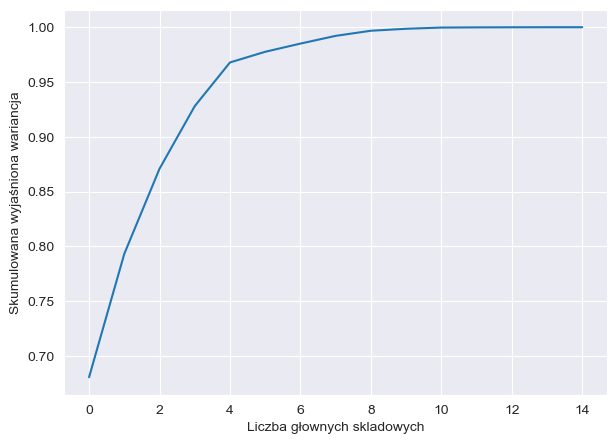

In [26]:
import numpy as np
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel("Liczba głownych skladowych")
plt.ylabel("Skumulowana wyjaśniona wariancja")
plt.gcf().set_size_inches(7, 5)

In [27]:
pca3 = PCA(svd_solver = 'full', n_components = 0.90)
pc = pca3.fit_transform(df.loc[:,exclude_filter])
pc_df = pd.DataFrame(data = pc)
pc_df['Nazwa'] = df['Nazwa']
pc_df

,0,1,2,3,Nazwa
0,0.077224,0.478463,-0.087593,0.572624,Alior Bank
1,-0.155617,1.011251,-1.684940,-0.574601,Bank Millennium
2,5.806928,-1.201618,4.169210,-0.470419,Bank Pekao
3,-5.294890,-2.552920,-1.466663,5.367300,Bank Pocztowy
4,-0.352859,-0.743658,3.437079,0.144013,BNP Paribas
5,-5.629305,-0.439033,-0.216447,-1.224160,BOŚ Bank
6,-4.457429,0.159757,0.291037,-1.004481,Citi Handlowy
7,-3.445918,-0.670329,0.131263,-0.885300,Credit Agricole
8,-4.288005,-0.907453,-0.374221,-0.816060,Eurobank
9,-4.828903,-1.215840,0.050449,-1.062694,Getin Noble Bank
